In [2]:
#sobreajuste
import tensorflow as tf
from tensorflow import keras as keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras. optimizers import Adam, RMSprop, SGD
from keras.regularizers import L1, L2, L1L2
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import History

dataset= mnist.load_data()
(x_train, y_train), (x_test,y_test) = dataset #Son las variables separadas de los datos de entrenamiento y pruebas

#Ahora aplanamos las imágenes y convertimos en punto flotante
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_trainv = x_train.astype('float32')
x_testv = x_test.astype('float32')

lr = 0.001  #learning rate
num_clases = 10
y_trainc = keras.utils.to_categorical(y_train, num_clases)
y_testc = keras.utils.to_categorical(y_test, num_clases)

modelo_overfit = Sequential([
    Dense(512, activation='sigmoid', input_shape=(784,)),
    Dense(10, activation="softmax")
])

modelo_overfit.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=1e-4),metrics=['accuracy'])
history = modelo_overfit.fit(x_trainv, y_trainc, batch_size = 10, epochs = 55, validation_data = (x_testv, y_testc))
modelo_overfit.save("modelo_overfit.h5")

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/55
6000/6000 [==============================] - 40s 6ms/step - loss: 0.4614 - accuracy: 0.8773 - val_loss: 0.2674 - val_accuracy: 0.9248
Epoch 2/55
6000/6000 [==============================] - 38s 6ms/step - loss: 0.2382 - accuracy: 0.9329 - val_loss: 0.2095 - val_accuracy: 0.9388
Epoch 3/55
6000/6000 [==============================] - 50s 8ms/step - loss: 0.1922 - accuracy: 0.9452 - val_loss: 0.1849 - val_accuracy: 0.9462
Epoch 4/55
6000/6000 [==============================] - 40s 7ms/step - loss: 0.1662 - accuracy: 0.9522 - val_loss: 0.1593 - val_accuracy: 0.9537
Epoch 5/55
6000/6000 [==============================] - 36s 6ms/step - loss: 0.1478 - accuracy: 0.9577 - val_loss: 0.1497 - val_accuracy: 0.9553
Epoch 6/55
6000/6000 [==============================] - 37s 6ms/step - loss: 0.1339 - accuracy: 0.9614 - val_loss: 0.1397 - val_accuracy: 0.9593
Epoch 7/55
6000/6000 [==============================] - 45s 7ms/s

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


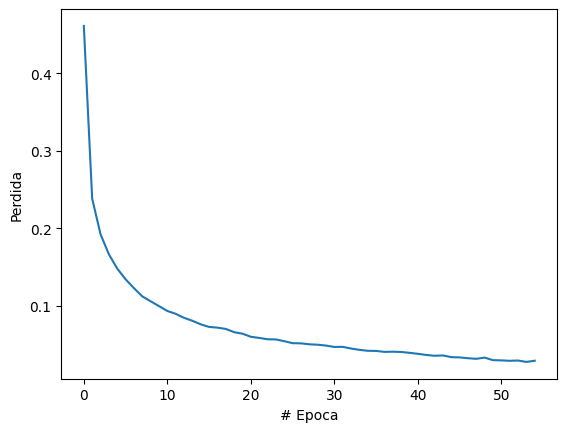

In [3]:
import matplotlib.pyplot as plt
from keras.callbacks import History

# Assuming you have a history object from a previous training session
plt.xlabel("# Epoca")
plt.ylabel("Perdida")
plt.plot(history.history["loss"])

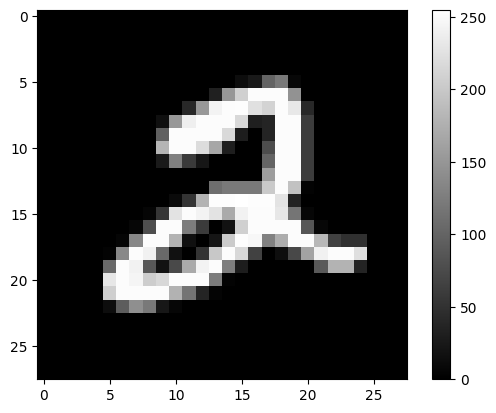

In [4]:
import matplotlib.pyplot as plt
image = x_train[5].reshape((28, 28))
plt.figure()
plt.imshow(image, cmap="gray")#número de imagen en el mnist
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
score = modelo_overfit.evaluate(x_testv, y_testc, verbose=1) #evaluar la eficiencia del modelo
print(score)
a=modelo_overfit.predict(x_testv) #predicción de la red entrenada
print(a.shape)
print(a[1])
print("resultado correcto:")
print(y_testc[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0806 - accuracy: 0.9777
[0.0806398019194603, 0.9776999950408936]
313/313 [==============================] - 1s 2ms/step
(10000, 10)
[9.4933831e-08 6.8765854e-07 9.9999839e-01 6.1345156e-07 3.7048919e-12
 4.5315002e-08 5.0817985e-09 6.7661640e-11 1.1958993e-07 8.1233353e-10]
resultado correcto:
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
